# Problem Statement:

    Everyone who sells their house wants to get the best price possible for it. The problem is determining what your house is already worth and what can be done to improve it. This project aims to use machine learning models to predict housing prices and determine what the most important features are that correlate to sale price and if there are viable ways to implement changes to these features to improve housing price. This project will use data from the Ames data set, which contains over 80 features about houses from Ames, Iowa. The data is split into a training set, which includes sale price and  testing set which will be used to test the model against new, unseen data.


## Hypothesis:

    Based on my own experiences in the real estate industry (working on and off with my father, who own his own real estate company, for 9 years) I predict that improvements made to the overall quality and condition of the house will raise its price. In other words, how well a house maintained determines housing price.

In [2]:
# loads in neccissary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, LogisticRegression, LogisticRegressionCV, Lasso, LassoCV
from sklearn import metrics
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
import statsmodels.api as sm

In [3]:
# sets graph style

plt.style.use('Solarize_Light2')
plt.style.use('bmh')

# Data Importation and Cleaning:

In [4]:
# loads in train and test datasets
train_df = pd.read_csv('./datasets/train.csv')

test_df = pd.read_csv('./datasets/test.csv')
index = test_df['Id']

In [5]:
# looks at top 5 rows of train dataframe
train_df.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour  ... Screen Porch Pool Area Pool QC Fence  \
0       IR1          Lvl  ...            0         0     NaN   NaN   
1       IR1          Lvl  ...            0         0     NaN   NaN   
2       Reg          Lvl  ...            0         0     NaN   NaN   
3       Reg          Lvl  ...            0         0     NaN   NaN   
4       IR1          Lvl  ...            0         0     NaN   NaN   

  Misc Feature Misc Val Mo Sold Yr Sold  Sale Type  SalePrice  
0          NaN        0       3    2010        WD      130500  
1          NaN        0       4    2009        WD      220000  
2          NaN        0       1    2010        WD      109000  
3          NaN        0       4    2010        WD      174000  
4          NaN        0       3    2010        WD      138500  

[5 rows x 81 columns]

In [6]:
# looks at # of null values and dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Looking at this data set there are columns missing some values while others only have a hand full of none NAN values. To fix this, for numeric columns, NAN will be replaced with the mean of the column and for string columns, NAn will be replace with the string "NAP" meaning Not Applicable.

In [7]:
# replaces numeric nan values with mean and strings with NAP or Not Applicable
train_df.fillna(train_df.mean(), inplace=True)
train_df.fillna('NAP', inplace=True)

In [8]:
# sets dataframe so all rows can be seen
pd.set_option('display.max_rows', None)

In [10]:
baseline_df = train_df

In [16]:
# null hypothesis/baseline score
y = baseline_df["SalePrice"]
# baseline predictions
null_preds = []
for i in range(len(y)):
    null_preds.append(y.mean())

# baseline rmse score
metrics.mean_squared_error(y, null_preds)**(0.5)

79239.33504161824

In [9]:
# Sets ordinal valued columns to numeric based on their kaggle data dictionary

baseline_df['Lot Shape'] = baseline_df['Lot Shape'].replace({'IR1':3, 'IR2':2,'IR3':1,'Reg':4, 'NAP':0})

baseline_df['Exter Qual'] = baseline_df['Exter Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Exter Cond'] = baseline_df['Exter Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Bsmt Qual'] = baseline_df['Bsmt Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Bsmt Cond'] = baseline_df['Bsmt Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['BsmtFin Type 1'] = baseline_df['BsmtFin Type 1'].replace({'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1, 'NAP':0})

baseline_df['Heating QC'] = baseline_df['Heating QC'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Fireplace Qu'] = baseline_df['Fireplace Qu'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Garage Qual'] = baseline_df['Garage Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Garage Cond'] = baseline_df['Garage Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Utilities'] = baseline_df['Utilities'].replace({'AllPub':4, 'NoSewr':3,'NoSeWa':2,'ELO':1, 'NAP':0})

baseline_df['Land Slope'] = baseline_df['Land Slope'].replace({'Gtl':3, 'Mod':2,'Sev':1, 'NAP':0})

baseline_df['Bsmt Exposure'] = baseline_df['Bsmt Exposure'].replace({'Gd':4,'Av':3,'Mn':2, 'No':1, 'NAP':0})

baseline_df['BsmtFin Type 2'] = baseline_df['BsmtFin Type 2'].replace({'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1, 'NAP':0})

baseline_df['Electrical'] = baseline_df['Electrical'].replace({'SBrkr':5, 'FuseA':4,'FuseF':3,'FuseP':2, 'Mix':1, 'NAP':0})

baseline_df['Kitchen Qual'] = baseline_df['Kitchen Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

baseline_df['Functional'] = baseline_df['Functional'].replace({'Typ':8, 'Min1':7,'Min2':6,'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1, 'NAP':0})

baseline_df['Garage Finish'] = baseline_df['Garage Finish'].replace({'Fin':3, 'RFn':2,'Unf':1, 'NAP':0})

baseline_df['Paved Drive'] = baseline_df['Paved Drive'].replace({'Y':3, 'P':2,'N':1, 'NAP':0})

baseline_df['Fence'] = baseline_df['Fence'].replace({'GdPrv':4, 'MnPrv':3,'GdWo':2,'MnWw':1, 'NAP':0})

baseline_df['Pool QC'] = baseline_df['Pool QC'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})



In [10]:
baseline_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [11]:
baseline_df = pd.get_dummies(data = baseline_df, columns= ["MS SubClass", 'MS Zoning' ,'Mas Vnr Type','Street','Alley',
                                                           'Land Contour','Central Air', 'Garage Type','Lot Config',
                                                           'Neighborhood','Condition 1','Condition 2','Bldg Type','House Style',
                                                           'Roof Style','Roof Matl', 'Exterior 1st','Exterior 2nd',
                                                           'Foundation','Heating','Misc Feature','Sale Type'
                                                           ],drop_first= True)

In [12]:
# simple linear model that predicts sale price using all columns after their cleaning and transformations
lr_baseline = LinearRegression()
X_baseline = baseline_df.drop(columns = 'SalePrice')
y_baseline = baseline_df['SalePrice']

lr_baseline.fit(X_baseline,y_baseline)

base_pred = lr_baseline.predict(X_baseline)

metrics.mean_squared_error(y_baseline,base_pred)**0.5

20754.12680249498

In [13]:
# correlation of every column compared to Sale Price
baseline_df.corr()[['SalePrice']].sort_values(by = 'SalePrice')



SalePrice
Mas Vnr Type_None     -0.424088
Garage Type_Detchd    -0.370344
Foundation_CBlock     -0.355535
Lot Shape             -0.294542
MS Zoning_RM          -0.281951
PID                   -0.255052
Roof Style_Gable      -0.249329
MS SubClass_30        -0.248534
Garage Type_NAP       -0.230990
Sale Type_WD          -0.212542
Neighborhood_OldTown  -0.208371
Exterior 1st_Wd Sdng  -0.191734
Neighborhood_NAmes    -0.189387
Neighborhood_IDOTRR   -0.189237
MS SubClass_50        -0.182336
Neighborhood_Edwards  -0.176119
Exterior 2nd_Wd Sdng  -0.172971
Fence                 -0.159060
Exterior 1st_MetalSd  -0.149851
Exterior 2nd_MetalSd  -0.139339
Enclosed Porch        -0.135656
Neighborhood_BrkSide  -0.134790
Neighborhood_Sawyer   -0.133692
MS Zoning_C (all)     -0.126253
Kitchen AbvGr         -0.125444
Foundation_Slab       -0.119052
MS SubClass_160       -0.114944
Condition 1_Feedr     -0.114350
Exterior 1st_HdBoard  -0.114332
Bldg Type_Twnhs       -0.113895
Neighborhood_MeadowV  -0.111558
Bldg Type_2fmCon      -0.111423
MS SubClass_190       -0.109262
Bldg Type_Duplex      -0.103689
MS SubClass_90        -0.103689
Exterior 2nd_HdBoard  -0.102462
Overall Cond          -0.097019
Neighborhood_BrDale   -0.095305
Land Contour_Lvl      -0.092830
Lot Config_Inside     -0.082194
MS SubClass_70        -0.076012
Neighborhood_SWISU    -0.074214
Heating_Grav          -0.072549
Garage Type_CarPort   -0.071955
Heating_Wall          -0.071311
Roof Matl_CompShg     -0.069108
House Style_1.5Unf    -0.066805
MS SubClass_180       -0.066534
House Style_SFoyer    -0.064088
Exterior 2nd_Wd Shng  -0.061164
Exterior 1st_Stucco   -0.060864
Sale Type_ConLD       -0.060431
MS SubClass_45        -0.060326
Exterior 2nd_Plywood  -0.059541
Land Slope            -0.057990
Garage Type_Basment   -0.055720
Condition 1_RRAe      -0.053633
Exterior 2nd_Stucco   -0.051885
Id                    -0.051398
Exterior 1st_WdShing  -0.048866
Condition 2_Feedr     -0.048455
Exterior 2nd_Brk Cmn  -0.047893
Misc Feature_Shed     -0.047419
Neighborhood_NPkVill  -0.047296
Bsmt Half Bath        -0.045290
House Style_SLvl      -0.042098
Roof Style_Gambrel    -0.041883
Low Qual Fin SF       -0.041594
MS SubClass_85        -0.040193
Exterior 1st_Plywood  -0.039125
Heating_GasW          -0.037814
Neighborhood_Mitchel  -0.035574
Sale Type_ConLw       -0.035479
Exterior 2nd_CBlock   -0.035276
Exterior 1st_CBlock   -0.034783
MS SubClass_40        -0.034780
MS Zoning_I (all)     -0.034519
MS Zoning_RH          -0.034118
Condition 2_RRNn      -0.033403
MS SubClass_80        -0.031417
Sale Type_Oth         -0.030109
Exterior 1st_AsphShn  -0.027621
Neighborhood_Blueste  -0.025226
Condition 1_RRNe      -0.025045
Exterior 2nd_Stone    -0.024642
Exterior 1st_BrkComm  -0.024377
Foundation_Stone      -0.023853
Exterior 2nd_AsphShn  -0.023834
Heating_OthW          -0.021969
House Style_1Story    -0.021652
Roof Style_Mansard    -0.021289
Misc Feature_Gar2     -0.019508
Yr Sold               -0.015203
Condition 1_RRAn      -0.014954
Lot Config_FR2        -0.014823
Alley_Pave            -0.014528
Condition 2_RRAn      -0.012421
Neighborhood_Landmrk  -0.012395
Condition 2_Norm      -0.009759
MS SubClass_150       -0.009217
Misc Feature_Othr     -0.008841
Misc Val              -0.007375
Foundation_Wood       -0.003044
Condition 2_RRAe       0.002378
Neighborhood_Greens    0.003476
Sale Type_CWD          0.004563
Roof Matl_Tar&Grv      0.007018
Exterior 2nd_BrkFace   0.010688
House Style_2.5Unf     0.010793
Condition 1_RRNn       0.011442
Roof Style_Shed        0.013136
BsmtFin Type 2         0.014070
Lot Config_FR3         0.014352
BsmtFin SF 2           0.016249
Neighborhood_SawyerW   0.016708
Roof Matl_Membran      0.016732
Misc Feature_TenC      0.019101
Sale Type_ConLI        0.019588
Exterior 1st_ImStucc   0.022446
Pool Area              0.023106
Neighborhood_Gilbert   0.023974
MS SubClass_75         0.026191
Exterior 1st_BrkFace   0.026240
Utilities              0.026404
Pool QC               

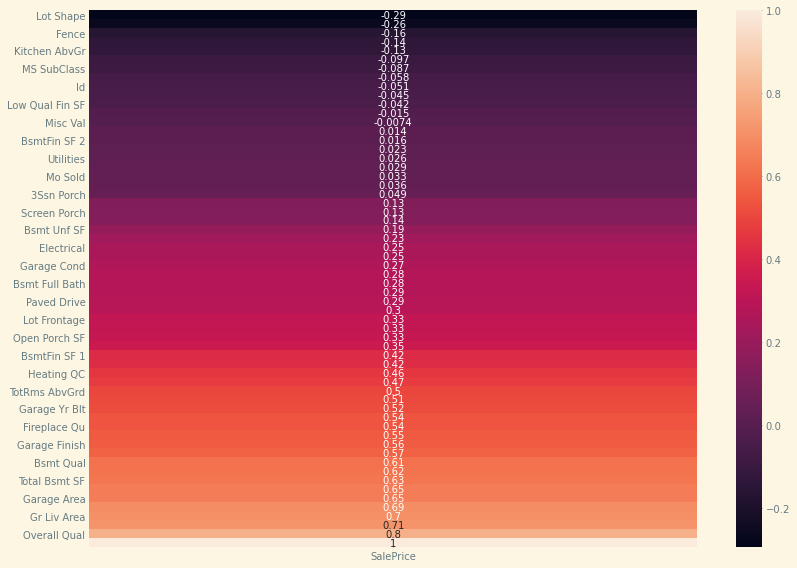

In [14]:
# Heat map of coloumns and their correlation to sale price
plt.figure(figsize = (12,8))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by = 'SalePrice'),
            annot = True);
plt.tight_layout()

In [15]:
train_df.corr()[['SalePrice']].sort_values(by = 'SalePrice')

SalePrice
Lot Shape        -0.294542
PID              -0.255052
Fence            -0.159060
Enclosed Porch   -0.135656
Kitchen AbvGr    -0.125444
Overall Cond     -0.097019
MS SubClass      -0.087335
Land Slope       -0.057990
Id               -0.051398
Bsmt Half Bath   -0.045290
Low Qual Fin SF  -0.041594
Yr Sold          -0.015203
Misc Val         -0.007375
BsmtFin Type 2    0.014070
BsmtFin SF 2      0.016249
Pool Area         0.023106
Utilities         0.026404
Pool QC           0.029275
Mo Sold           0.032735
Exter Cond        0.036418
3Ssn Porch        0.048732
Functional        0.125682
Screen Porch      0.134581
Bedroom AbvGr     0.137067
Bsmt Unf SF       0.190132
Bsmt Cond         0.225075
Electrical        0.247842
2nd Flr SF        0.248452
Garage Cond       0.265021
Half Bath         0.283001
Bsmt Full Bath    0.283429
Garage Qual       0.285281
Paved Drive       0.290472
Lot Area          0.296566
Lot Frontage      0.325850
Wood Deck SF      0.326490
Open Porch SF     0.333476
BsmtFin Type 1    0.350362
BsmtFin SF 1      0.423346
Bsmt Exposure     0.424863
Heating QC        0.458354
Fireplaces        0.471093
TotRms AbvGrd     0.504014
Mas Vnr Area      0.508602
Garage Yr Blt     0.516738
Full Bath         0.537969
Fireplace Qu      0.538925
Year Remod/Add    0.550370
Garage Finish     0.557839
Year Built        0.571849
Bsmt Qual         0.612188
1st Flr SF        0.618486
Total Bsmt SF     0.628668
Garage Cars       0.648197
Garage Area       0.650246
Kitchen Qual      0.692336
Gr Liv Area       0.697038
Exter Qual        0.712146
Overall Qual      0.800207
SalePrice         1.000000

This list of dataframe of correlations shows that Overall Quality of the house, is the most correlated with the housing price, as predicted

In [16]:
# select feature I deemed most impoartant
features = ["Overall Qual",'Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF',
            '1st Flr SF','Year Built','Garage Yr Blt','Full Bath','Year Remod/Add',
            'TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1',
 'Lot Frontage','Lot Area', 'Lot Shape','Kitchen Qual', "Bsmt Exposure", 'Garage Finish',
'Overall Cond','Mas Vnr Type','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','BsmtFin Type 1',
'Heating QC','Central Air','Fireplace Qu','Garage Type','Garage Qual','Garage Cond','SalePrice']

Based on the correaltions above and intuition, the list features contains only the columns that I deem nessicary for the model

In [17]:
# sets train dataframe so only the wanted columns are selected
train_df  = train_df[features]

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Overall Qual    2051 non-null   int64  
 1   Gr Liv Area     2051 non-null   int64  
 2   Garage Area     2051 non-null   float64
 3   Garage Cars     2051 non-null   float64
 4   Total Bsmt SF   2051 non-null   float64
 5   1st Flr SF      2051 non-null   int64  
 6   Year Built      2051 non-null   int64  
 7   Garage Yr Blt   2051 non-null   float64
 8   Full Bath       2051 non-null   int64  
 9   Year Remod/Add  2051 non-null   int64  
 10  TotRms AbvGrd   2051 non-null   int64  
 11  Mas Vnr Area    2051 non-null   float64
 12  Fireplaces      2051 non-null   int64  
 13  BsmtFin SF 1    2051 non-null   float64
 14  Lot Frontage    2051 non-null   float64
 15  Lot Area        2051 non-null   int64  
 16  Lot Shape       2051 non-null   int64  
 17  Kitchen Qual    2051 non-null   i

all columns need to be changed to having only numeric columns inorder to fit a linear regression

In [19]:
# dummies nominal valued columns

train_df = pd.get_dummies(data = train_df, columns= [ 'Mas Vnr Type',
                                                   'Central Air', 'Garage Type'],drop_first= True)

In [20]:
# removes outliers from train data
for i in train_df.columns:

    if train_df[i].mean() >= 10:
        
        drop =  train_df[i] < (train_df[i].mean() + train_df[i].std() *3)
        train_df = train_df[drop]
        drop =  train_df[i] > (train_df[i].mean() - train_df[i].std() *3)
        train_df = train_df[drop]

In [21]:
# creates new columns based on columns that are correlated to each other

train_df['Overall Cond * Qual'] = train_df['Overall Qual'] * train_df['Overall Cond']
train_df['Garage Area * Cars'] = train_df['Garage Area'] * train_df['Garage Cars']
train_df['Live Area * Rooms above ground'] = train_df['Gr Liv Area'] * train_df['TotRms AbvGrd']
train_df['Live Area * 1st floor sf'] = train_df['Gr Liv Area'] * train_df['1st Flr SF']
train_df['Year built * Year remod/add'] = train_df['Year Built'] * train_df['Year Remod/Add']
train_df['Quality * Live Area'] = train_df['Gr Liv Area'] * train_df['Overall Qual']
train_df['Garage Qual * Overall Qual'] = train_df['Garage Qual'] * train_df['Overall Qual']
train_df['Lot Frontage * Lot Area'] = train_df['Lot Frontage'] * train_df['Lot Area']
train_df['Lot Shape * Lot Area'] = train_df['Lot Shape'] * train_df['Lot Area']
train_df['Overall Qual * Exter Qual'] = train_df['Overall Qual'] * train_df['Exter Qual']
train_df['Bsmt Qual * Overall Qual'] = train_df['Bsmt Qual'] * train_df['Overall Qual']
train_df['BsmtFin SF 1 * BsmtFin Type 1'] = train_df['BsmtFin SF 1'] * train_df['BsmtFin Type 1']
train_df['Fireplaces * Fireplace Qu'] = train_df['Fireplaces'] * train_df['Fireplace Qu']
train_df['Bsmt Cond * Bsmt Qual'] = train_df['Bsmt Cond'] * train_df['Bsmt Qual']
train_df['Central Air * Heating QC'] = train_df['Central Air_Y'] * train_df['Heating QC']
train_df['TotRms AbvGrd * Full Bath'] = train_df['TotRms AbvGrd'] * train_df['Full Bath']
train_df['Overall Qual * Kitchen Qual'] = train_df['Overall Qual'] * train_df['Kitchen Qual']

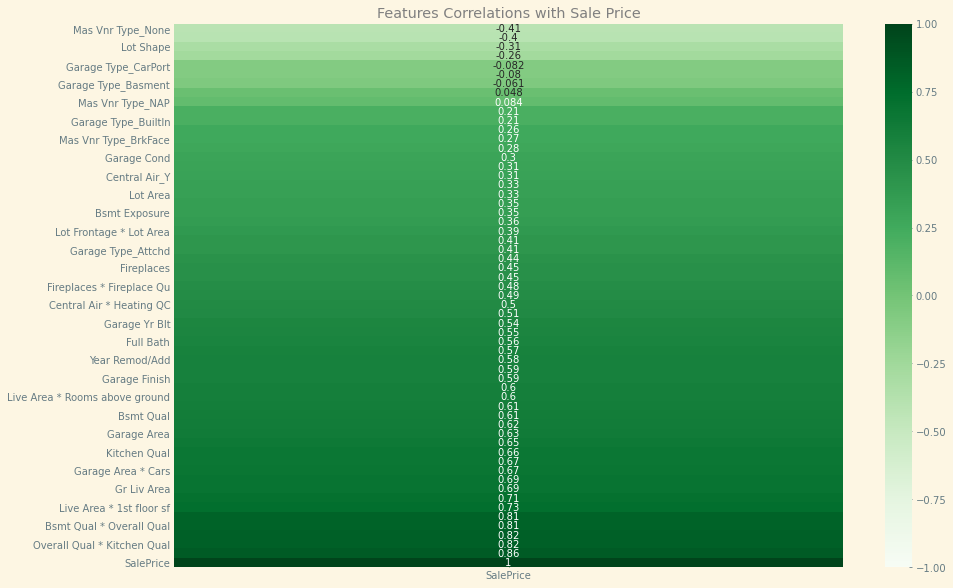

In [22]:
# heat map including new columns
plt.figure(figsize = (15,10))
sns.heatmap(train_df.corr()[['SalePrice']].sort_values(by = 'SalePrice'), vmin= -1, vmax = 1, annot = True,cmap='Greens');
plt.title('Features Correlations with Sale Price').set_color('grey');


plt.savefig('images/corr_heatmap.png',bbox_inches = 'tight');


In [23]:
train_df.corr()[['SalePrice']].sort_values(by = 'SalePrice')

SalePrice
Mas Vnr Type_None               -0.408105
Garage Type_Detchd              -0.400355
Lot Shape                       -0.309826
Garage Type_NAP                 -0.262517
Garage Type_CarPort             -0.082262
Overall Cond                    -0.080437
Garage Type_Basment             -0.060681
Exter Cond                       0.048084
Mas Vnr Type_NAP                 0.084371
Lot Shape * Lot Area             0.206545
Garage Type_BuiltIn              0.209559
Bsmt Cond                        0.258967
Mas Vnr Type_BrkFace             0.265197
Mas Vnr Type_Stone               0.280847
Garage Cond                      0.301497
Garage Qual                      0.310772
Central Air_Y                    0.313862
Lot Frontage                     0.331273
Lot Area                         0.334042
BsmtFin Type 1                   0.345491
Bsmt Exposure                    0.348724
BsmtFin SF 1                     0.362986
Lot Frontage * Lot Area          0.388578
Mas Vnr Area                     0.410780
Garage Type_Attchd               0.413062
BsmtFin SF 1 * BsmtFin Type 1    0.444563
Fireplaces                       0.454121
TotRms AbvGrd                    0.454848
Fireplaces * Fireplace Qu        0.482842
Heating QC                       0.488605
Central Air * Heating QC         0.503702
Fireplace Qu                     0.510619
Garage Yr Blt                    0.540585
Overall Cond * Qual              0.552294
Full Bath                        0.560094
1st Flr SF                       0.570605
Year Remod/Add                   0.583628
TotRms AbvGrd * Full Bath        0.585131
Garage Finish                    0.585487
Total Bsmt SF                    0.596673
Live Area * Rooms above ground   0.597878
Bsmt Cond * Bsmt Qual            0.605082
Bsmt Qual                        0.609761
Year Built                       0.619248
Garage Area                      0.631171
Garage Cars                      0.646694
Kitchen Qual                     0.664450
Year built * Year remod/add      0.667488
Garage Area * Cars               0.673557
Exter Qual                       0.691883
Gr Liv Area                      0.692202
Garage Qual * Overall Qual       0.711082
Live Area * 1st floor sf         0.729011
Overall Qual                     0.805259
Bsmt Qual * Overall Qual         0.809219
Overall Qual * Exter Qual        0.822676
Overall Qual * Kitchen Qual      0.822814
Quality * Live Area              0.857914
SalePrice                        1.000000

This updated correlation dataframe, shows once again, quality is very correlated with housing price, both for the overall quality and the quality of individual parts of the house

# Modeling:

For my modeling process I use a pipeline, linear regression, K Nearest Neighbors, Ridge and Lasso

In [24]:
# creates linear regresion, ridge regresion and knn models
lr = LinearRegression()
X = train_df.drop(columns = ['SalePrice'])
y = train_df['SalePrice']

X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

lr.fit(X_train,y_train)

LinearRegression()

In [25]:
pipe = Pipeline(([
    ('sc', StandardScaler()),
    ('knn', KNeighborsRegressor())
]))


pipe_params = {
    'sc__with_mean':[True, False],
    'sc__with_std':[True, False],
    'knn__n_neighbors':[3, 5, 7, 11, 25],
    'knn__weights' : ['uniform', 'distance']
}


pipe_gridsearch = GridSearchCV(pipe, 
                                 pipe_params, 
                                 cv=5, 
                                 n_jobs=4)


In [26]:
pipe_gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('sc', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             n_jobs=4,
             param_grid={'knn__n_neighbors': [3, 5, 7, 11, 25],
                         'knn__weights': ['uniform', 'distance'],
                         'sc__with_mean': [True, False],
                         'sc__with_std': [True, False]})

In [27]:
# gives the standard scaler and knn paramaters that produced the best score
pipe_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsRegressor(n_neighbors=11, weights='distance'))])

In [25]:
# standardises X_train and X_test to be used in knn
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

# set knn with paramaters found in the pipe gridsearch
knn = KNeighborsRegressor(n_neighbors=11 ,weights='distance')
knn.fit(Z_train,y_train)

KNeighborsRegressor(n_neighbors=11, weights='distance')

In [26]:
# Creates lasso 
alphas = np.logspace(-3, 3, 100)


lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=50000, n_jobs=4)


lasso_cv.fit(X_train, y_train);

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184979598902.04074, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 193661015381.64215, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184194798570.21457, tolerance: 439673860.75352454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\l

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179155846032.95364, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181413105721.67963, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190710026526.68152, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\l

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 179516241005.96948, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177005326264.34894, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 187825415455.10446, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\l

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175938288978.88324, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178772700317.405, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 186271766731.2979, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\line

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185508890856.47333, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175446260068.61188, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178564579053.5499, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\li

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175228029396.3809, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185099855156.52097, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178491177609.2011, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\lin

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175132581111.2229, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178471439226.36227, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177223311217.42496, tolerance: 439673860.75352454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\li

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175091081517.40146, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184917069526.8579, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177215207482.29678, tolerance: 439673860.75352454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\li

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177212130636.54462, tolerance: 439673860.75352454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178462787184.0344, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184902163891.9915, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\lin

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178461914276.6567, tolerance: 443427592.53461975
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175066181401.18878, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184897286682.15704, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\li

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184895697618.23422, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177964227446.23923, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184895658647.091, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\lin

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 175060816169.87723, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 177209319558.4357, tolerance: 439673860.75352454
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184895204105.9435, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\lin

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173989869450.5842, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173956889252.20892, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173928070704.8858, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\lin

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173733474461.68732, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173732787550.2786, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173732196766.53574, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\li

In [27]:
# best alpha determined by the lasso
lasso_cv.alpha_

26.560877829466893

In [28]:
# created ridge variable using the best alpha 
ridge = Ridge(alpha=26.560877829466893)

ridge.fit(X_train, y_train)

Ridge(alpha=26.560877829466893)

In [29]:
# mamkes predictions for each model
pred_lr = lr.predict(X_test)

pred_ridge = ridge.predict(X_test)

pred_knn = knn.predict(Z_test)

pred_lasso = lasso_cv.predict(X_test)

In [30]:
# Linear Regression R2 scores

lr_train = lr.score(X_train,y_train)

lr_test = lr.score(X_test,y_test)

lr_cross = cross_val_score(lr,X_train,y_train).mean()

print(f'Train R2 score: {lr_train}, Test R2 score: {lr_test}, Cross Val R2 score: {lr_cross}')

Train R2 score: 0.9191842324099564, Test R2 score: 0.9074017041049016, Cross Val R2 score: 0.9096716761841221


In [31]:
# KNN R2 scores

knn_train = knn.score(Z_train,y_train)

knn_test = knn.score(Z_test,y_test)

knn_cross = cross_val_score(knn,Z_train,y_train).mean()

print(f'Train R2 score: {knn_train}, Test R2 score: {knn_test}, Cross Val R2 score: {knn_cross}')

Train R2 score: 0.9999985655361564, Test R2 score: 0.8458093507182335, Cross Val R2 score: 0.8656855881517143


In [32]:
# Ridge R2 scores

ridge_train = ridge.score(X_train,y_train)

ridge_test = ridge.score(X_test,y_test)

ridge_cross = cross_val_score(ridge,X_train,y_train).mean()

print(f'Train R2 score: {ridge_train}, Test R2 score: {ridge_test}, Cross Val R2 score: {ridge_cross}')

Train R2 score: 0.9173466583320148, Test R2 score: 0.9084897721653838, Cross Val R2 score: 0.9096539649928141


In [36]:
# Lasso R2 scores

lasso_cv_train = lasso_cv.score(X_train,y_train)

lasso_cv_test = lasso_cv.score(X_test,y_test)

lasso_cv_cross = cross_val_score(lasso_cv,X_train,y_train).mean()

print(f'Train R2 score: {lasso_cv_train}, Test R2 score: {lasso_cv_test}, Cross Val R2 score: {lasso_cv_cross}')

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 173241347958.01553, tolerance: 449597896.66332793
  model = cd_fast.enet_coordinate_descent(
C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190915502721.14572, tolerance: 454582739.47195107
  model = cd_fast.enet_coordinate_descent(


Train R2 score: 0.9185566318538325, Test R2 score: 0.9080318978869831, Cross Val R2 score: 0.9097993702018758


C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 176608054521.1371, tolerance: 443059439.23321605
  model = cd_fast.enet_coordinate_descent(


In [37]:
# baseline score 
baseline = y_test.mean()
baseline

171981.82489451478

In [33]:
# RMSE scores for lr, knn and ridge

lr_rmse = metrics.mean_squared_error(y_test,pred_lr,squared=False)

knn_rmse = metrics.mean_squared_error(y_test,pred_knn,squared=False)

ridge_rmse = metrics.mean_squared_error(y_test,pred_ridge,squared=False)

lasso_rmse = metrics.mean_squared_error(y_test,pred_lasso,squared=False)



print(f'lr rmse: {lr_rmse}, knn rmse: {knn_rmse}, ridge rmse: {ridge_rmse}, lasso rmse: {lasso_rmse}')

lr rmse: 18504.232367130535, knn rmse: 23878.03557427195, ridge rmse: 18395.19494161714, lasso rmse: 18441.157984717156


In [34]:
# cross_predic scores for ln\r, knn, ridge


pred_lr_cross = cross_val_predict(lr,X_test,y_test)

pred_ridge_cross = cross_val_predict(ridge,X_test,y_test)

pred_knn_cross = cross_val_predict(knn,Z_test,y_test)

pred_lasso_cross = cross_val_predict(lasso_cv,Z_test,y_test)


lr_rmse_cross = metrics.mean_squared_error(y_test,pred_lr_cross,squared=False)

knn_rmse_cross = metrics.mean_squared_error(y_test,pred_knn_cross,squared=False)

ridge_rmse_cross = metrics.mean_squared_error(y_test,pred_ridge_cross,squared=False)

lasso_rmse_cross = metrics.mean_squared_error(y_test,pred_lasso_cross,squared=False)

print(f'lr rmse cross: {lr_rmse_cross}, knn rmse cross: {knn_rmse_cross}, ridge rmse cross: {ridge_rmse_cross} lasso rmse cross: {lasso_rmse_cross}')

lr rmse cross: 20528.441713907712, knn rmse cross: 24562.15388708119, ridge rmse cross: 19873.360664188225 lasso rmse cross: 20025.542241384755


Although the linear regression, had a better R2 score, the model I decieded to use for the final prediction was the ridge as it had the lowest rmse and cross val rmse

In [35]:
# Make the test dataset have the same columns as the train dataset

f_test = ["Overall Qual",'Gr Liv Area','Garage Area','Garage Cars','Total Bsmt SF',
            '1st Flr SF','Year Built','Garage Yr Blt','Full Bath','Year Remod/Add',
            'TotRms AbvGrd','Mas Vnr Area','Fireplaces','BsmtFin SF 1',
 'Lot Frontage','Lot Area', 'Lot Shape','Kitchen Qual', "Bsmt Exposure", 'Garage Finish',
'Overall Cond','Mas Vnr Type','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','BsmtFin Type 1',
'Heating QC','Central Air','Fireplace Qu','Garage Type','Garage Qual','Garage Cond']

test_df  = test_df[f_test]

test_df.fillna(test_df.mean(), inplace = True)
test_df.fillna('NAP', inplace=True)

test_df['Lot Shape'] = test_df['Lot Shape'].replace({'IR1':3, 'IR2':2,'IR3':1,'Reg':4, 'NAP':0})

test_df['Exter Qual'] = test_df['Exter Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Exter Cond'] = test_df['Exter Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Bsmt Qual'] = test_df['Bsmt Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Bsmt Cond'] = test_df['Bsmt Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['BsmtFin Type 1'] = test_df['BsmtFin Type 1'].replace({'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3, 'LwQ':2, 'Unf':1, 'NAP':0})

test_df['Heating QC'] = test_df['Heating QC'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Fireplace Qu'] = test_df['Fireplace Qu'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Garage Qual'] = test_df['Garage Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Garage Cond'] = test_df['Garage Cond'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Kitchen Qual'] = test_df['Kitchen Qual'].replace({'Ex':5, 'Gd':4,'TA':3,'Fa':2, 'Po':1, 'NAP':0})

test_df['Garage Finish'] = test_df['Garage Finish'].replace({'Fin':3, 'RFn':2,'Unf':1, 'NAP':0})

test_df['Bsmt Exposure'] = test_df['Bsmt Exposure'].replace({'Gd':4,'Av':3,'Mn':2, 'No':1, 'NAP':0})



test_df = pd.get_dummies(data = test_df, columns= [ 'Mas Vnr Type',
                                                    'Central Air', 'Garage Type'],drop_first= True)



test_df['Overall Cond * Qual'] = test_df['Overall Qual'] * test_df['Overall Cond']
test_df['Garage Area * Cars'] = test_df['Garage Area'] * test_df['Garage Cars']
test_df['Live Area * Rooms above ground'] = test_df['Gr Liv Area'] * test_df['TotRms AbvGrd']
test_df['Live Area * 1st floor sf'] = test_df['Gr Liv Area'] * test_df['1st Flr SF']
test_df['Year built * Year remod/add'] = test_df['Year Built'] * test_df['Year Remod/Add']
test_df['Quality * Live Area'] = test_df['Gr Liv Area'] * test_df['Overall Qual']
test_df['Garage Qual * Overall Qual'] = test_df['Garage Qual'] * test_df['Overall Qual']
test_df['Lot Frontage * Lot Area'] = test_df['Lot Frontage'] * test_df['Lot Area']
test_df['Lot Shape * Lot Area'] = test_df['Lot Shape'] * test_df['Lot Area']
test_df['Overall Qual * Exter Qual'] = test_df['Overall Qual'] * test_df['Exter Qual']
test_df['Bsmt Qual * Overall Qual'] = test_df['Bsmt Qual'] * test_df['Overall Qual']
test_df['BsmtFin SF 1 * BsmtFin Type 1'] = test_df['BsmtFin SF 1'] * test_df['BsmtFin Type 1']
test_df['Fireplaces * Fireplace Qu'] = test_df['Fireplaces'] * test_df['Fireplace Qu']
test_df['Bsmt Cond * Bsmt Qual'] = test_df['Bsmt Cond'] * test_df['Bsmt Qual']
test_df['Central Air * Heating QC'] = test_df['Central Air_Y'] * test_df['Heating QC']
test_df['TotRms AbvGrd * Full Bath'] = test_df['TotRms AbvGrd'] * test_df['Full Bath']
test_df['Overall Qual * Kitchen Qual'] = test_df['Overall Qual'] * test_df['Kitchen Qual']

In [36]:
# drops column 'Mas Vnr Type_CBlock' from test_df as this column is not in train_df
test_df.drop(columns = ['Mas Vnr Type_CBlock'], inplace=True)

In [37]:
# uses ridge model to predict sale price for the test dataset and saves it as a csv
ridge_test = ridge.predict(test_df)

prediction_csv = pd.DataFrame({'Id': index , 'SalePrice': ridge_test}).to_csv('datasets/test_preds.csv', index = False)

# Data analysis

In [38]:
model = cross_val_predict(ridge,X,y)

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


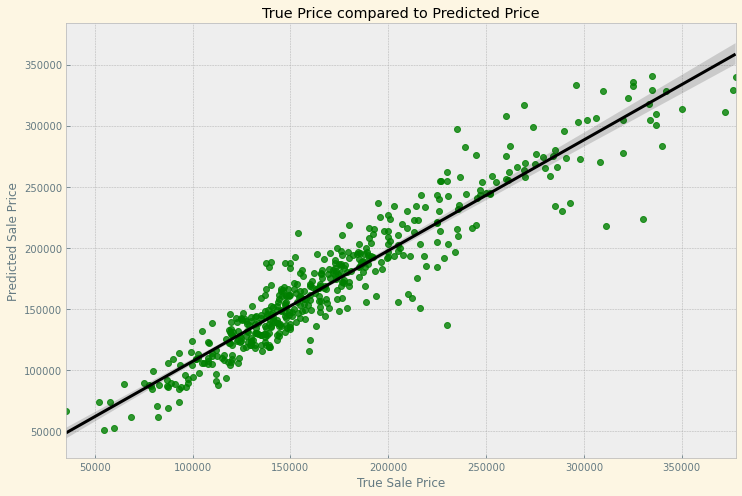

In [44]:
# creates scatter plot with linear regression between x and y variable
plt.figure(figsize = (12,8))

sns.regplot(y_test,pred_ridge_cross, color = 'green',line_kws = {'color': 'black'})

plt.title('True Price compared to Predicted Price').set_color('black')
plt.xlabel('True Sale Price')
plt.ylabel("Predicted Sale Price");

plt.savefig('images/true_preds.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


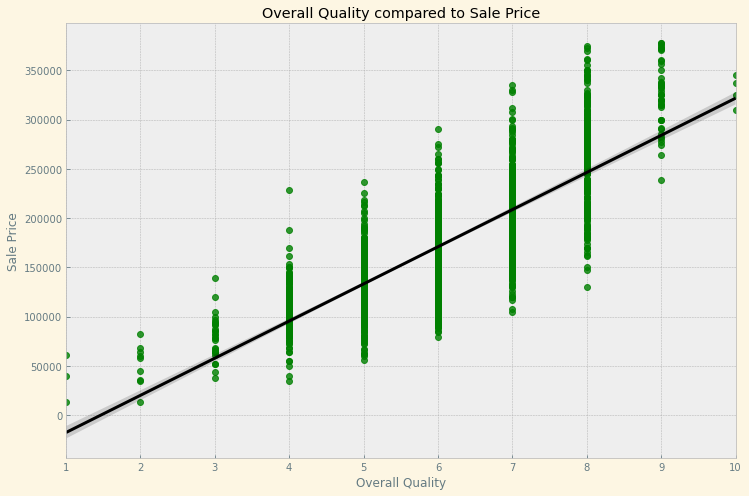

In [45]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Overall Qual'],train_df['SalePrice'], color = 'green',line_kws = {'color': 'black'})

plt.title('Overall Quality compared to Sale Price').set_color('black')
plt.xlabel('Overall Quality')
plt.ylabel("Sale Price");
plt.savefig('images/qual_price.png',bbox_inches = 'tight');
plt.xticks()

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


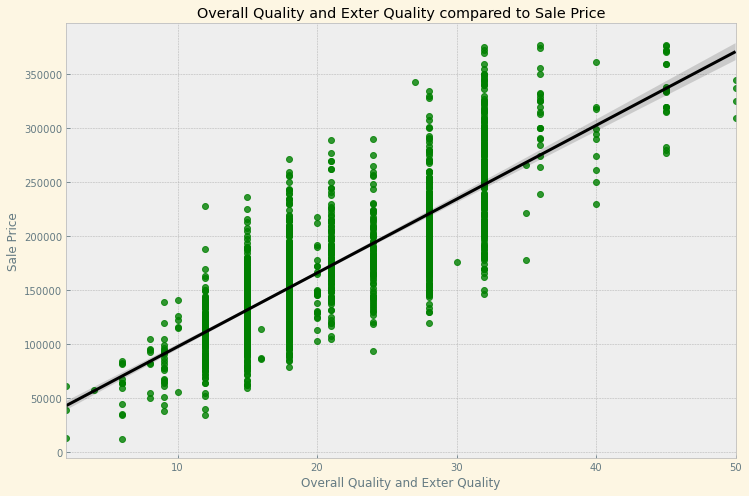

In [54]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Overall Qual * Exter Qual'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})

plt.title('Overall Quality and Exter Quality compared to Sale Price').set_color('black')
plt.xlabel('Overall Quality and Exter Quality')
plt.ylabel("Sale Price");

plt.savefig('images/exterqual_price.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


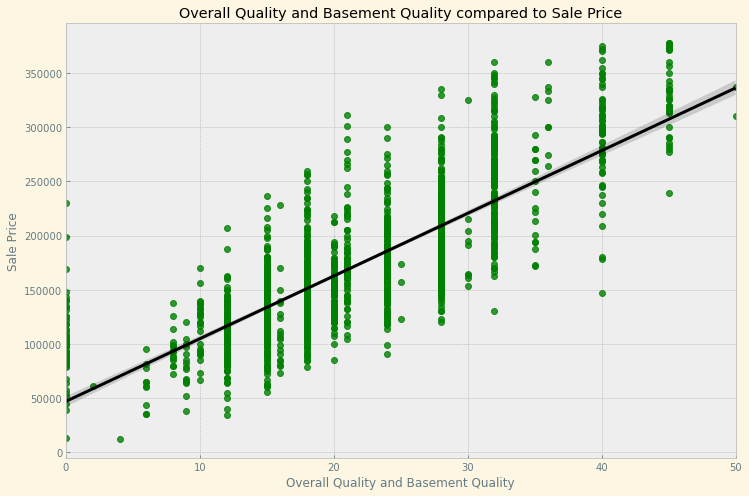

In [55]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Bsmt Qual * Overall Qual'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})

plt.title('Overall Quality and Basement Quality compared to Sale Price').set_color('black')
plt.xlabel('Overall Quality and Basement Quality')
plt.ylabel("Sale Price");

plt.savefig('images/bsmtqual_price.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


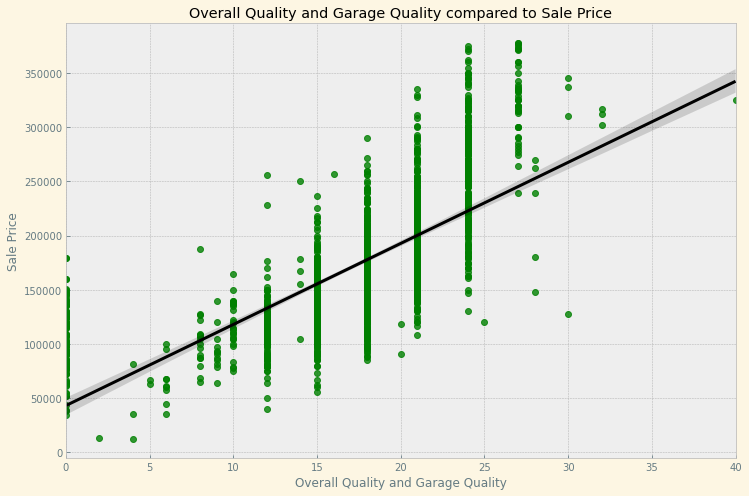

In [56]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Garage Qual * Overall Qual'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})

plt.title('Overall Quality and Garage Quality compared to Sale Price').set_color('black')
plt.xlabel('Overall Quality and Garage Quality')
plt.ylabel("Sale Price");

plt.savefig('images/garagequal_price.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


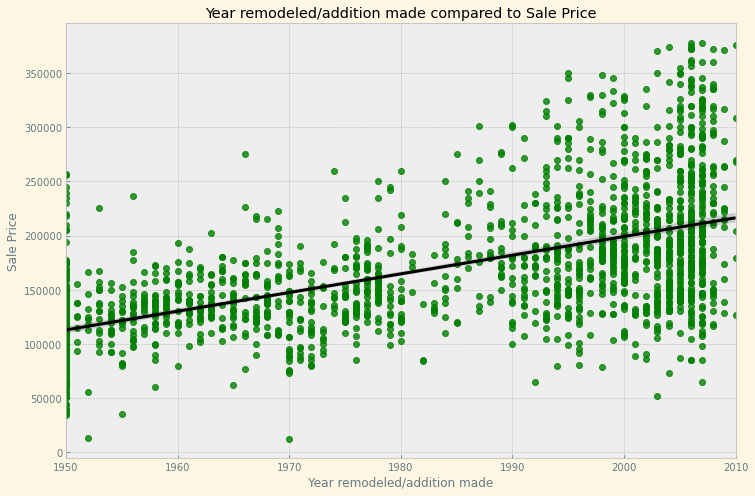

In [57]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Year Remod/Add'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})

plt.title('Year remodeled/addition made compared to Sale Price').set_color('black')
plt.xlabel('Year remodeled/addition made')
plt.ylabel("Sale Price");
plt.savefig('images/remod_price.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


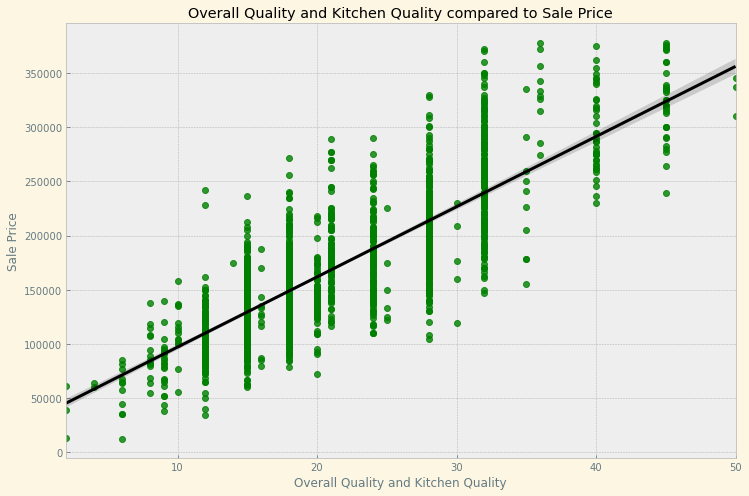

In [58]:
plt.figure(figsize = (12,8))
sns.regplot(train_df['Overall Qual * Kitchen Qual'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})
plt.title('Overall Quality and Kitchen Quality compared to Sale Price').set_color('black')
plt.xlabel('Overall Quality and Kitchen Quality')
plt.ylabel("Sale Price");
plt.savefig('images/kitchenqual_price.png',bbox_inches = 'tight');

C:\Users\tonyt\anaconda3\envs\dsi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


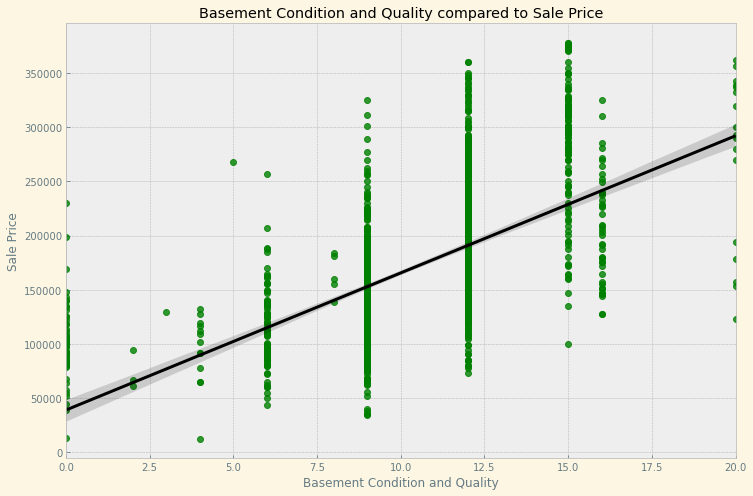

In [59]:
plt.figure(figsize = (12,8))

sns.regplot(train_df['Bsmt Cond * Bsmt Qual'],train_df['SalePrice'], color = 'g',line_kws = {'color': 'black'})

plt.title('Basement Condition and Quality compared to Sale Price').set_color('black')
plt.xlabel('Basement Condition and Quality')
plt.ylabel("Sale Price");
plt.savefig('images/bsmtcond_price.png',bbox_inches = 'tight');

As shown by the correlation data frame and the scatter plots above, the most important factors for determining the price of a house is the overall quality of the house and the overall quality with combined with the quality of individual parts of the house. Other important factors were the square footage of the house, total rooms above ground, general living area, and the size of and amount of cars a garage can fit. The scatter plots above show a clear positive correlation between quality and housing price, meaning that above all else a house's price is determined by how well it has been taken care of and the current state that the house is in.


# Conclusion and Recomandations

### Conclusion:

    The hypothesis was proven correct and the model was able to predict the price of houses better than the baseline model was. This means that increasing the quality of one's home will lead to an increase in the sale price of that home. The models that predicted prediction were the linear regression and the ridge, with a slightly lower rmse and was therefor selected to be the final model to predict sale price in the Kaggle competition. Dispite its low bias. low variance and good rmse in this note book, the model only achieved an rmse of just over 21,000 and increase of 3,000 over the rmse calculated in this notebook. However this score is still much better than the baseline model which had an rmse of 79239.33.

### Recommandations:
    Based on the model, and my own personal experiences I suggest that home owners looking to sell should do simple and cheap but efficient home renovations and improvements to increase their home's sale value. These include; Exterior: landscaping, reseeding the grass, trimming hedges and tree's, adding or replacing flowers and other decorative plants, repaving the driveway, repainting the outside of the house, repairing any damages, Interior: repainting the walls, polishing the floors, steam cleaning the carpets, replacing old appliances and cleaning newer ones, replacing old/broken windows or cleaning them, making sure everything works and is hooked up properly, and cleaning all furniture and countertops. All of these things are cheap to do (especially if you do them yourself) and are easier and faster than expanding the house or a feature of the house, which would also increase its sale value.
